In [24]:
import os
import PIL.Image as Image
import torch.cuda
import torchvision.transforms as transforms
import numpy as np

from LookGenerator.datasets.utils import prepare_images_for_encoder, to_array_from_decoder, load_image, convert_channel, show_array_as_image
from LookGenerator.networks.encoder_decoder import EncoderDecoder
from LookGenerator.networks.utils import load_model

# Загрузка изображений

In [4]:
root = r"C:\Users\Даша\кто\мусор\zalando-hd-resized\val"
file_name = r"00006_00"

human_image = load_image(root, r"imageWithNoCloth", file_name, ".png")
clothes = load_image(root, r"cloth", file_name, r".jpg")

pose_points = []
points_list = os.listdir(os.path.join(
    root,
    r"posePoints",
    file_name
))
print(len(points_list))
for pose_point in points_list:
    pose_point_image = convert_channel(load_image(root, os.path.join(r"posePoints", file_name), pose_point, ""))
    pose_points.append(pose_point_image)

17


# Определение трансформаций

In [5]:
input_rgb_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

input_bin_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5],
        std=[0.25]
    )
])

# Загрузка весов модели

In [6]:
model_input = prepare_images_for_encoder(human_image, pose_points, clothes, input_rgb_transform, input_bin_transform).float()

In [7]:
weights_dir = r"C:\Users\Даша\PycharmProjects\SMBackEnd\LookGenerator\weights\unet_epoch_159.pt"

In [8]:
model = EncoderDecoder(in_channels=23, out_channels=3)
model = load_model(model, weights_dir)

In [9]:
device = 'cpu' if torch.cuda.is_available() else 'cpu'

model = model.to(device)
model_input = model_input.to(device)

# Прогон модели

In [32]:
model_output = model(model_input)

# Отображение результата

In [33]:
model_output.shape

torch.Size([1, 3, 256, 192])

In [34]:
model_output = to_array_from_decoder(model_output)

In [35]:
model_output.max()

1.0

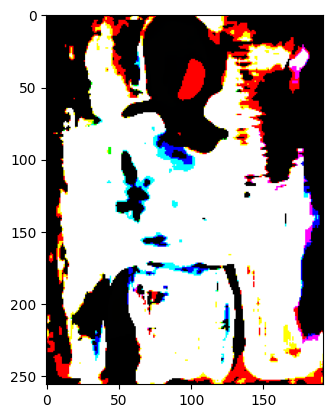

In [25]:
show_array_as_image(model_output)

In [17]:
model_output.shape

(256, 192, 3)